In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import timeit
%matplotlib inline

In [39]:
%run "../scripts/data_preprocessing.py"

df_1501 = preprocess(pd.read_pickle('../cache/c_201501.pkl'))
#df_1506 = data_preprocessing.preprocess(pd.read_pickle('../cache/c_201506.pkl'))
df_1512 = preprocess(pd.read_pickle('../cache/c_201512.pkl'))
#df_1606 = data_preprocessing.preprocess(pd.read_pickle('../cache/c_201606.pkl'))
df_1612 = preprocess(pd.read_pickle('../cache/c_201612.pkl'))

In [35]:
df_1612.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460406 entries, 6510032 to 10533210
Data columns (total 53 columns):
DAX                             460406 non-null datetime64[ns]
CIC                             460406 non-null uint32
SEGMENT                         460406 non-null int8
SUBSEGMENT                      460406 non-null int8
GENDER                          460406 non-null int8
MARITAL_STATUS                  460406 non-null int8
EDUCATION                       460406 non-null int8
PROFESSION                      460406 non-null int16
BCR_EMPLOYEE                    460406 non-null int8
WORKOUT_FLAG                    460406 non-null int8
RATING_VALUE                    460406 non-null int8
BRANCH_CODE                     460406 non-null uint16
CLIENT_DPD                      460406 non-null uint16
MARKETING_AGREEMENT             460406 non-null int8
FLAG_ACTIVE_34                  460406 non-null int8
UNSECURED                       460406 non-null int8
SECURED         

In [36]:
df_1612.head().T

,6510032,6510033,6510034,6510035,6510036
DAX,2016-12-01 00:00:00,2016-12-01 00:00:00,2016-12-01 00:00:00,2016-12-01 00:00:00,2016-12-01 00:00:00
CIC,6831511,6833875,6839104,6854759,6871487
SEGMENT,1,1,1,1,1
SUBSEGMENT,1,1,2,2,2
GENDER,2,2,1,1,1
MARITAL_STATUS,1,2,4,3,2
EDUCATION,9,9,7,7,9
PROFESSION,29495,25686,-2776,-2776,-2776
BCR_EMPLOYEE,0,0,0,0,0
WORKOUT_FLAG,0,0,0,0,0


In [40]:
df_1612.describe().T

,count,mean,std,min,25%,50%,75%,max
CIC,460406.0,2.939413e+07,3.093351e+08,3.670400e+04,1.931752e+06,7.282844e+06,1.142002e+07,4.294967e+09
SEGMENT,460406.0,1.027354e+00,2.502526e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
SUBSEGMENT,460406.0,8.559467e+00,2.519451e+01,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.900000e+01
GENDER,460406.0,1.446386e+00,5.277378e-01,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
MARITAL_STATUS,460406.0,1.132212e+00,1.207276e+00,-1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
EDUCATION,460406.0,3.683914e+00,4.445940e+00,-1.000000e+00,-1.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00
PROFESSION,460406.0,1.986784e+04,1.257162e+04,-2.776000e+03,2.410700e+04,2.627700e+04,2.724400e+04,3.005100e+04
BCR_EMPLOYEE,460406.0,1.572525e-03,1.096832e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
WORKOUT_FLAG,460406.0,1.710447e-02,1.651433e-01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
RATING_VALUE,460406.0,7.371038e-01,3.187310e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,9.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD62588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000144FA828>]], dtype=object)

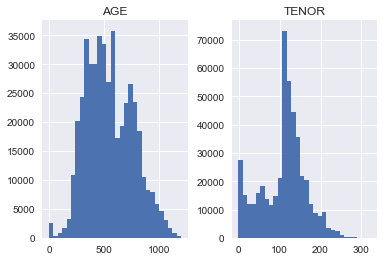

In [51]:
df_1612[['AGE', 'TENOR']].hist(bins=30)

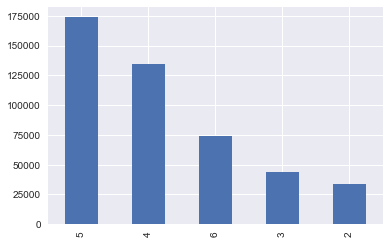

In [19]:
ax = df_1612['ACCOUNT'].value_counts().plot(kind='bar')
ax.set_xlabel("x label")